In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np


In [5]:
df = pandas.read_csv('DATA/USERS/all_data.csv', dtype={'candidates': 'S10'})

In [6]:
df.columns

Index([u'_id', u'author', u'sentiment', u'time', u'tweet', u'url', u'a_id',
       u'title', u'date_written', u'org', u't_id', u'candidates'],
      dtype='object')

In [99]:
tweet_count = list(df.author.value_counts()) 
print "Tweets per Author"
df.author.value_counts().describe(percentiles=[.10,.25,.5,.75,.99])

Tweets per Author


count    22540.000000
mean         6.121473
std         40.330685
min          1.000000
10%          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
99%        120.610000
max       2103.000000
Name: author, dtype: float64

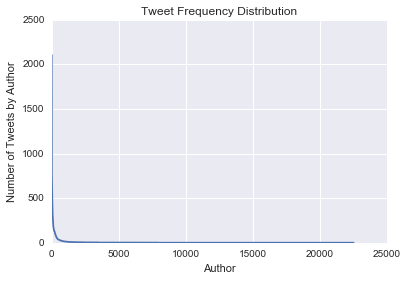

In [96]:
plt.plot(tweet_count)
plt.title("Tweet Frequency Distribution")
plt.xlabel("Author")
plt.ylabel("Number of Tweets by Author")
plt.savefig('FIGS/tweet_dist.png')

In [19]:
#cand2code={'HillaryClinton':0,"JohnKasich":1,'SenSanders':3, 'realDonaldTrump':2,'TedCruz':4}
follows_candid = df[df.candidates != '00000'] 
len(set(follows_candid.author))

14382

In [20]:
candids = ['00001','00010','00100','01000','10000']

In [21]:
single_candid = df[df.candidates.isin(candids)]

In [22]:
len(set(single_candid.author))

7003

In [25]:
# Distribution of follower camps-- distinct on author id

In [26]:
clinton_camp = df[df.candidates == '10000'] 
kasich_camp = df[df.candidates == '01000'] 
trump_camp = df[df.candidates == '00100'] 
sanders_camp = df[df.candidates == '00010'] 
cruz_camp = df[df.candidates == '00001'] 

In [40]:
print 'Number of Clinton-only followers:', len(set(clinton_camp.author))
print'Total tweets:', len(clinton_camp)  
print
print 'Number of Trump-only followers:', len(set(trump_camp.author))
print'Total tweets:', len(trump_camp)  
print
print 'Number of Sanders-only followers:', len(set(sanders_camp.author))
print'Total tweets:', len(sanders_camp)  
print
print 'Number of Cruz-only followers:', len(set(cruz_camp.author))
print'Total tweets:', len(cruz_camp)  
print
print 'Number of Kasich-only followers:', len(set(kasich_camp.author))
print'Total tweets:', len(kasich_camp)  
print

Number of Clinton-only followers: 2008
Total tweets: 7528

Number of Trump-only followers: 2131
Total tweets: 10177

Number of Sanders-only followers: 1728
Total tweets: 5266

Number of Cruz-only followers: 962
Total tweets: 3785

Number of Kasich-only followers: 174
Total tweets: 1400



In [103]:
# Who are the top tweeters in each camp?
clinton_camp.author.value_counts()[:10]

711881270     691
24481831      518
17544215      517
103576819     516
266876176     392
16305494      189
211300788     149
444304468     138
1866050042    133
87957969       84
Name: author, dtype: int64

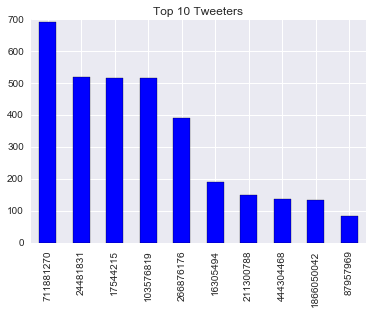

In [102]:
# Distribution of # tweets/user
#overall:
clinton_camp.author.value_counts()[:10].plot(kind='bar', title='Top 10 Tweeters')

# check prev dist graph for counts-- you might have gotten the axes wrong.

In [ ]:


#tweet_counts = list(df.author.value_counts())  
#plt.plot(tweet_counts)
#plt.title("User Tweet Frequency")
#plt.xlabel("Number of Times a User Tweeted")
#plt.ylabel("Count")
#plt.savefig('FIGS/tweeting_dist.png')


In [69]:
#df.author.value_counts()[:100]
#plt.plot(tweet_counts[:100])
#plt.title("User Tweet Frequency (Top 100 Users)")
#plt.xlabel("Number of Times a User Tweeted")
#plt.ylabel("Count")
#plt.savefig('FIGS/tweeting_dist_top_100.png')

#df.author.value_counts().plot()

#df.groupby(['author']).size().plot()

#for each camp:

In [161]:
#tweet_counts[:100]
#df.author.value_counts()

## Cutoff of 10 Tweets to Include a Tweeter

In [144]:
#authors = df.groupby("author").filter(lambda x: len(x) >= 10).author
authors_gt_10 = df.author.value_counts()[df.author.value_counts() >= 10].index

In [152]:
print len(set(authors_gt_10))
subset = df[df.author.isin(authors_gt_10)]

1339


In [153]:
subset.to_csv('DATA/GT_10_TWEETS.csv')

In [159]:
print "Number of authors > 10 tweets:", len(set(subset.author))
print "Number of tweets by those authors:", len(subset)
print "Number of unique stories they're tweeting about:", len(set(subset.a_id))

Number of authors > 10 tweets: 1339
Number of tweets by those authors: 101055
Number of unique stories they're tweeting about: 6496


In [163]:
#cand2code={'HillaryClinton':0,"JohnKasich":1,'SenSanders':3, 'realDonaldTrump':2,'TedCruz':4}
follows_candid = subset[subset.candidates != '00000'] 
len(set(follows_candid.author))

650

In [165]:
candids = ['00001','00010','00100','01000','10000']

In [166]:
single_candid = subset[subset.candidates.isin(candids)]

In [176]:
len(set(single_candid.author))
print len(single_candid)
print len(set(single_candid.title))

16890
4336


In [25]:
# Distribution of follower camps-- distinct on author id

In [170]:
clinton_camp = subset[subset.candidates == '10000'] 
kasich_camp = subset[subset.candidates == '01000'] 
trump_camp = subset[subset.candidates == '00100'] 
sanders_camp = subset[subset.candidates == '00010'] 
cruz_camp = subset[subset.candidates == '00001'] 

In [171]:
print 'Number of Clinton-only followers:', len(set(clinton_camp.author))
print'Total tweets:', len(clinton_camp)  
print
print 'Number of Trump-only followers:', len(set(trump_camp.author))
print'Total tweets:', len(trump_camp)  
print
print 'Number of Sanders-only followers:', len(set(sanders_camp.author))
print'Total tweets:', len(sanders_camp)  
print
print 'Number of Cruz-only followers:', len(set(cruz_camp.author))
print'Total tweets:', len(cruz_camp)  
print
print 'Number of Kasich-only followers:', len(set(kasich_camp.author))
print'Total tweets:', len(kasich_camp)  
print

Number of Clinton-only followers: 60
Total tweets: 4558

Number of Trump-only followers: 107
Total tweets: 6678

Number of Sanders-only followers: 47
Total tweets: 2465

Number of Cruz-only followers: 40
Total tweets: 2087

Number of Kasich-only followers: 4
Total tweets: 1102



In [195]:
print "Top 10 Shared Stories by Clinton-Only Followers"
clinton_camp.title.value_counts()[:10]
#.plot(kind='bar', title='Top 10 Stories for Clinton-Only Followers')
#plt.ylabel('Number of Tweets')


Top 10 Shared Stories by Clinton-Only Followers


Judge dismisses lawsuits over Clinton's emails                                      29
Ben Carson just called his new plan a 'genuine flat tax.' He's wrong.               16
GOP senators: If Cruz wins, we lose                                                 13
White House won't commit to supporting Sanders over guns                            13
Dont be fooled — Donald Trump’s ‘silent majority’ doesn’t exist                     12
GOP's Trump revolt: Too little too late?                                            12
Republican elders ask 'who's worse' for the GOP brand: Trump or Cruz                12
Pope vs. Trump: 'Not Christian' to only build border walls                          12
I Get Sanders’ Appeal. But He’s Not a Credible President.                           11
Diplomats, national security officials blast Sanders on Iran normalization, ISIL    11
Name: title, dtype: int64

In [196]:
print "Top 10 Shared Stories by Trump-Only Followers"
trump_camp.title.value_counts()[:10]

Top 10 Shared Stories by Trump-Only Followers


Trump basks in his spotlight                                                                                                                                                                                               43
FOX NEWS POLL: Trump, Cruz  lead Republican field nationally                                                                                                                                                               32
MEDIA BUZZ: Conservative elite, sounding a bit panicked, says Trump will destroy GOP - Trump says Cruz should resolve citizenship issue - Carson prays with Clemson coach ahead of title game - CAMPAIGN 2016 LIVE BLOG    31
Terrorists use Trump's 'Muslim ban' speech in recruitment video                                                                                                                                                            30
Why I'm voting for Trump                                                                                        

In [197]:
print "Top 10 Shared Stories by Sanders-Only Followers"
sanders_camp.title.value_counts()[:10]

Top 10 Shared Stories by Sanders-Only Followers


State Department asks for deadline extension on Hillary Clinton emails                 70
Bernie Sanders Will Win Iowa, New Hampshire, Nevada and South Carolina. Here's Why.    50
Hillary's Corporate Democrats Taking Down Bernie Sanders                               44
Bernie Sanders Is a Once in a Lifetime Presidential Candidate. The Time Is Now.        25
Bernie Sanders Is Now the 'Inevitable' Democratic Nominee and Presidential Winner      22
The Nation endorses Bernie Sanders                                                     21
Sanders cracks Clinton's Nevada firewall                                               18
On January 20, 2017 Bernie Sanders Will Be Sworn In as America's 45th President        18
5 Reasons Bernie Sanders Will Win the Presidency in a Landslide                        17
Donald Trump Is Shocking, Vulgar and Right                                             15
Name: title, dtype: int64

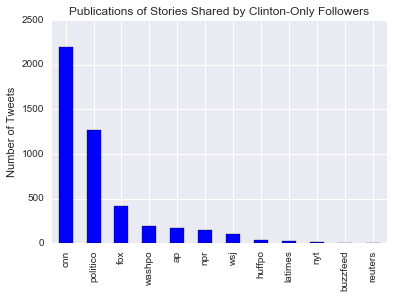

In [198]:
clinton_camp.org.value_counts().plot(kind='bar', title='Publications of Stories Shared by Clinton-Only Followers')
plt.ylabel('Number of Tweets')
plt.savefig('FIGS/clinton_camp_orgs.png')

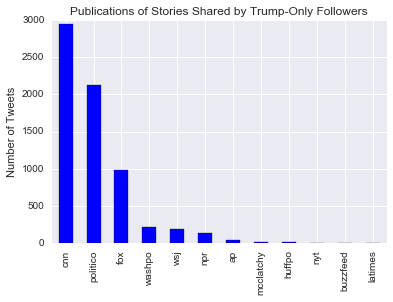

In [199]:
trump_camp.org.value_counts().plot(kind='bar', title='Publications of Stories Shared by Trump-Only Followers')
plt.ylabel('Number of Tweets')
plt.savefig('FIGS/trump_camp_orgs.png')

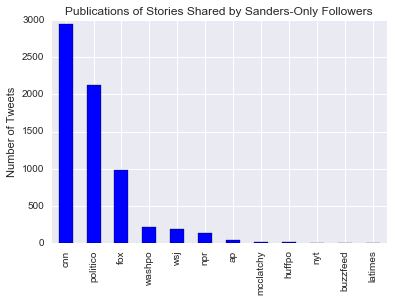

In [200]:
trump_camp.org.value_counts().plot(kind='bar', title='Publications of Stories Shared by Sanders-Only Followers')
plt.ylabel('Number of Tweets')
plt.savefig('FIGS/sanders_camp_orgs.png')

In [211]:
s = pandas.Series(subset.author.unique())
s.to_csv('DATA/GT_10_TWEETS/users.csv')
